# CA DATA MINING AND MACHINE LEARNING

In [152]:
import pandas as pd
import numpy as np 
import seaborn as sns
# for stats tests
import scipy.stats as st
# for regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# to find influential data points
from statsmodels.stats.outliers_influence import OLSInfluence
# for diagnostic tests
import statsmodels.stats.diagnostic as di
import statsmodels.stats.stattools as stt
# for general plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# for the linear regression model and splitting data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn. discriminant_analysis import \
( LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn. naive_bayes import GaussianNB
from sklearn. neighbors import KNeighborsClassifier
from sklearn. preprocessing import StandardScaler
from matplotlib .pyplot import subplots
import statsmodels .api as sm
from ISLP import load_data
from ISLP.models import ( ModelSpec as MS ,
summarize )
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Importing the datasets

In [9]:
df_sea_level = pd.read_csv('dataset2.csv')
df_mental_health = pd.read_csv('/Users/becca/Desktop/NCI -DA/APDV/x23436786/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days_20241204.csv')
df_reviews_amazon = pd.read_csv('Reviews.csv')

In [6]:
df_sea_level.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66


In [7]:
df_mental_health.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [11]:
df_reviews_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
#Checking the size of the datasets
print(df_sea_level.shape)
print(df_reviews_amazon.shape)
print(df_mental_health.shape)

(39617, 13)
(568454, 10)
(16794, 14)


## Dataset Sea Levels

#### Data pre processing (missing values, date format)

In [9]:
#Select the most importants columns for the study
sea_levels = df_sea_level[['Indicator','Source','Measure','Date','Value']]

In [10]:
df_sea_level.sort_values(by=['Date'], inplace=True)
df_sea_level.isnull()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
2542,False,False,True,False,False,False,False,False,False,False,False,False,False
2536,False,False,True,False,False,False,False,False,False,False,False,False,False
2537,False,False,True,False,False,False,False,False,False,False,False,False,False
2538,False,False,True,False,False,False,False,False,False,False,False,False,False
2539,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33059,False,False,True,False,False,False,False,False,False,False,False,False,False
33060,False,False,True,False,False,False,False,False,False,False,False,False,False
33058,False,False,True,False,False,False,False,False,False,False,False,False,False
33045,False,False,True,False,False,False,False,False,False,False,False,False,False


In this case, the NAN values are not in a important column for the statistical or machine learning models, so, i will delete them axis 1 its to specify that it is a column and all its to say all the records founded
Dont forget to add to the same dataframe the change

In [21]:
df_sea_level = df_sea_level.dropna(axis=1, how = 'all')

Checking if all the NAN values was removed

In [42]:
df_sea_level.isnull()

,ObjectId,Country,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
39612,False,False,False,False,False,False,False,False,False,False,False,False
39613,False,False,False,False,False,False,False,False,False,False,False,False
39614,False,False,False,False,False,False,False,False,False,False,False,False
39615,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
#The Date isnt in the datetime format, so, we need to convert to datetime and do more analysis 
# Remove the 'D' and convert the 'Date' column to datetime format
df_sea_level['Date'] = pd.to_datetime(df_sea_level['Date'].str[1:], format='%m/%d/%Y')

In [39]:
baltic_sea = df_sea_level[df_sea_level['Measure'] == 'Baltic Sea']
baltic_sea

,ObjectId,Country,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
5,6,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,1992-12-17,213.45
27,28,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,1992-12-26,219.65
54,55,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,1993-01-05,2.95
77,78,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,1993-01-15,55.05
107,108,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,1993-01-24,373.45
...,...,...,...,...,...,...,...,...,...,...,...,...
39498,39499,World,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,2024-01-29,336.00
39505,39506,World,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,2024-02-06,370.10
39535,39536,World,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,2024-02-17,253.00
39558,39559,World,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Baltic Sea,2024-02-23,189.90


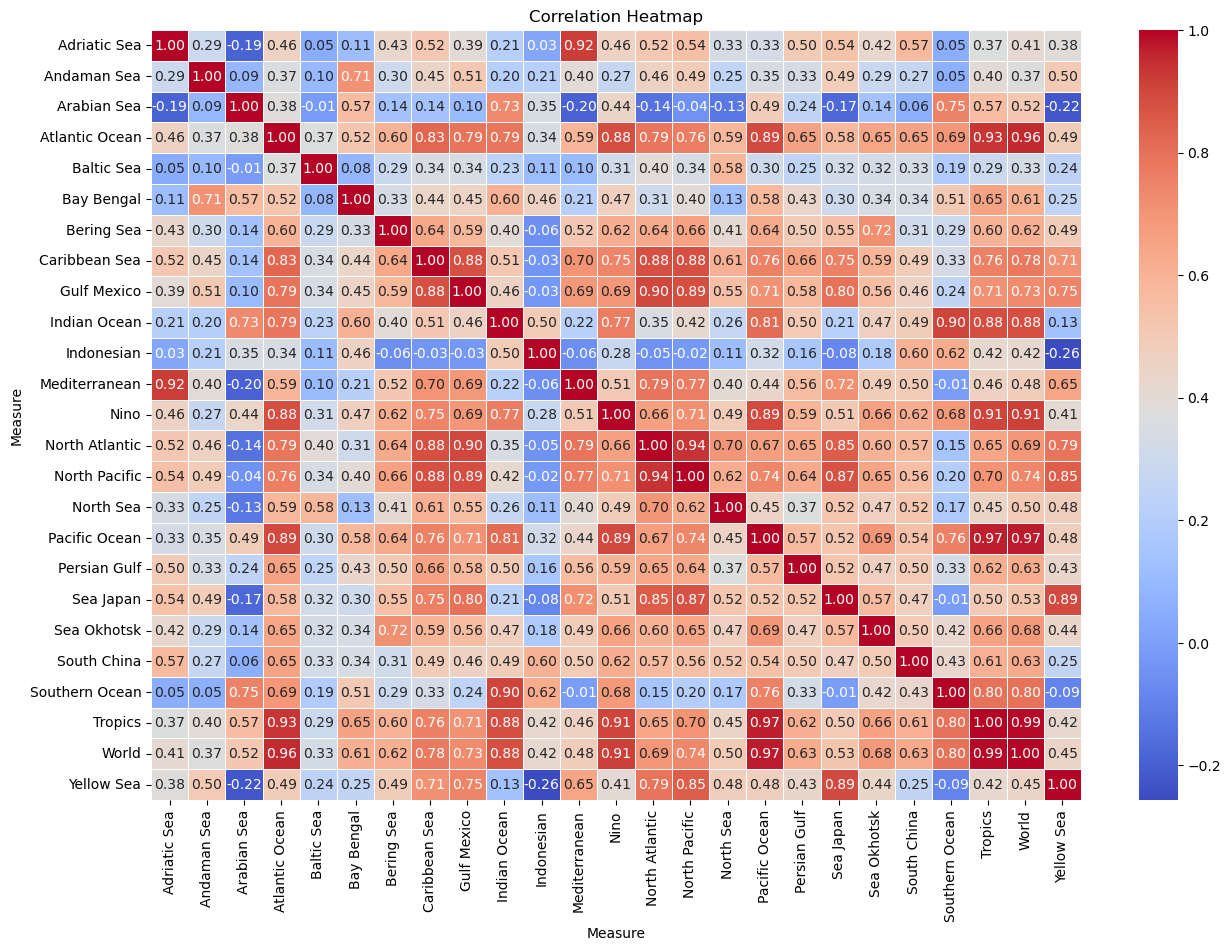

In [68]:
# Pivot the data to create a wide format DataFrame
pivot_df = df_sea_level.pivot_table(index='Date', columns='Measure', values='Value')
correlation_matrix = pivot_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

For further analysis, and to be possible apply the ARIMA Model Time Series, its necessary to choose only one sea to analyze. In this case, the choise was the mediterranean, because its the largest in the world.

In [164]:
df_mediterranean = df_sea_level[df_sea_level['Measure'] == 'Mediterranean']
df_mediterranean = df_mediterranean.sort_values(by='Date', ascending=True)
df_mediterranean = df_mediterranean.reset_index(drop=True)
df_mediterranean.head()

,ObjectId,Country,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,13,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,1992-12-17,48.86
1,31,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,1992-12-26,-19.24
2,62,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,1993-01-05,-91.14
3,84,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,1993-01-15,-58.14
4,113,World,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,1993-01-24,-101.84


#### Spliting the data in train and test

In [167]:
split = int(len(df_mediterranean) * 0.8)
# Split into train and test sets
df_mediterranean_train = df_mediterranean.iloc[:split]
df_mediterranean_test = df_mediterranean.iloc[split:]

#### Plot Mediterranean sea

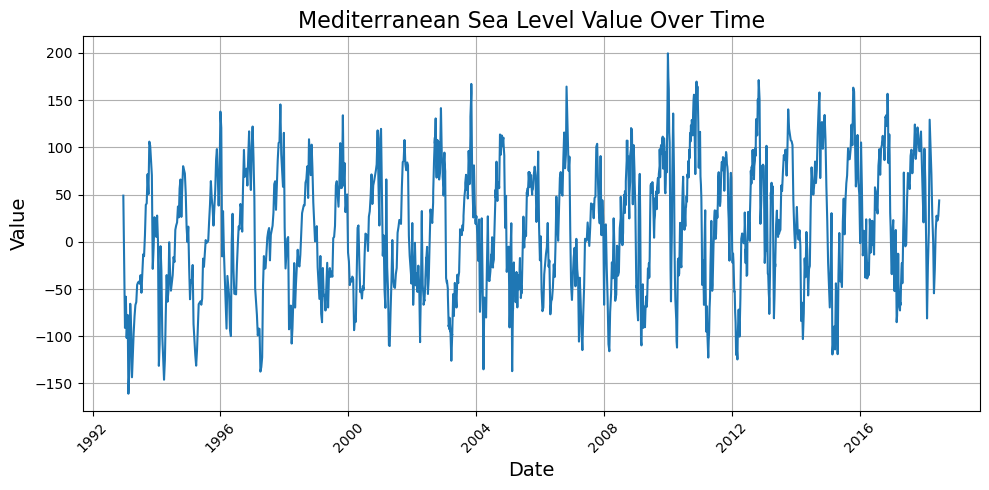

In [233]:
plt.figure(figsize=(10, 5)) 
plt.plot(df_mediterranean_train['Date'], df_mediterranean_train['Value'])
plt.title('Mediterranean Sea Level Value Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True) 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


We can see that the mediterranean level increased over time.

#### Decompose the time series to check seasonal

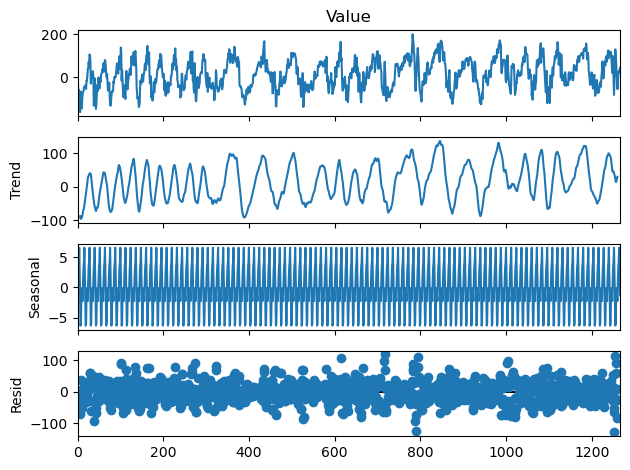

In [231]:
decomposition = seasonal_decompose(df_mediterranean_train['Value'], model='additive', period=12)
decomposition.plot()
plt.show()

Seasonality: The data has clear, stable seasonal patterns.
Trend: There is medium-term variability in the trend, which should be accounted for in forecasting models.
Residuals: The decomposition leaves behind random variations, but their randomness should be confirmed using statistical tests.
In this case, its necessary utilise the SARIMA for data with seasonal.

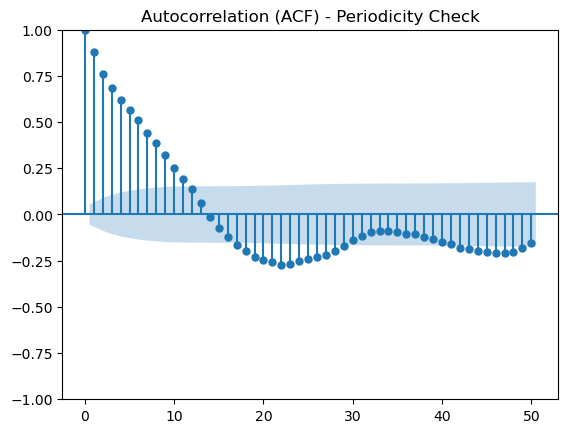

In [291]:
plot_acf(df_mediterranean_train['Value'], lags=50)
plt.title('Autocorrelation (ACF) - Periodicity Check')
plt.show()

Text(0.5, 1.0, 'Autocorrelation (PACF) - Periodicity Check')

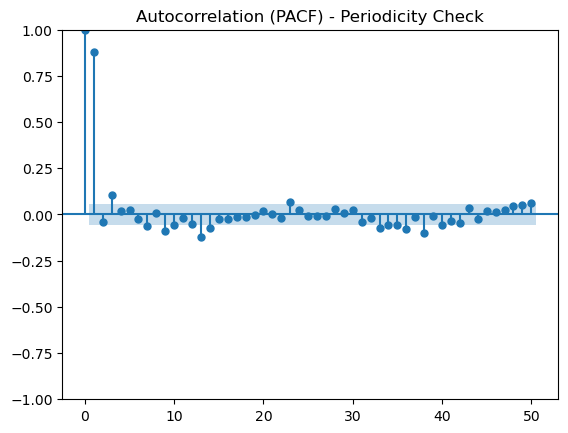

In [262]:
plot_pacf(df_mediterranean_train['Value'], lags=50)
plt.title('Autocorrelation (PACF) - Periodicity Check')

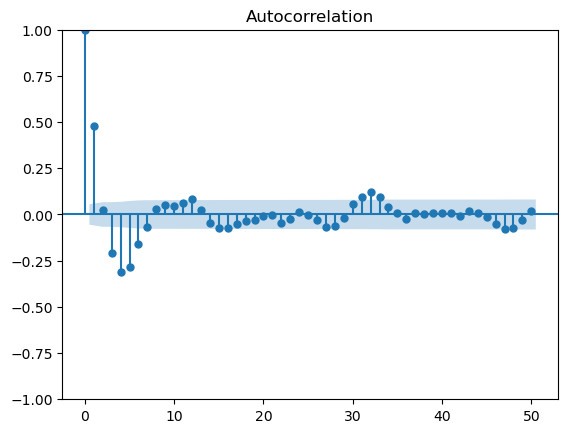

In [264]:
plot_acf(decomposition.resid.dropna(), lags=50)
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_mediterranean_train['Value'], model='additive', period=33)

# Plot the decomposition
decomposition.plot()
plt.show()

#### Stationarity

In [251]:
print(adfuller(df_mediterranean_train["Value"]))

(-9.591165091565848, 2.0342656002261e-16, 13, 1253, {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}, 12071.90356239795)


the series is non-stationary, so we need to do difference

In [ ]:
seasonal_period = 33
model = auto_arima(df_mediterranean_train['Value'], 
                   seasonal=True, 
                   m=seasonal_period,  # Seasonal period
                   trace=True,  # Displays the search process
                   error_action='ignore',  # Ignores non-stationary warnings
                   suppress_warnings=True, 
                   stepwise=True)  # Stepwise search for efficiency

# Summary of the best-fit model
print(model.summary())

Performing stepwise search to minimize aic


Plotting the seas and their values of changing

<Axes: xlabel='Value', ylabel='Measure'>

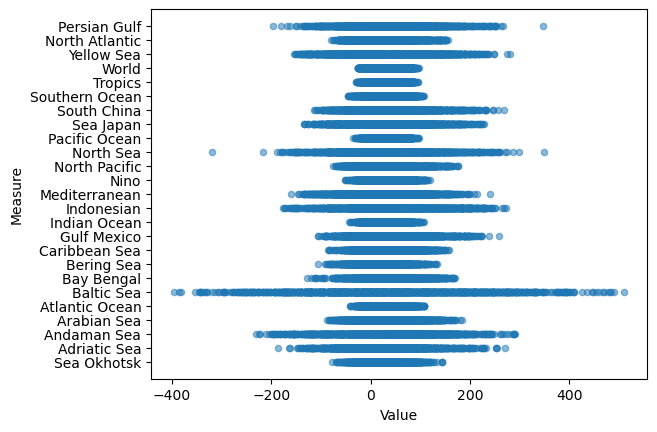

In [80]:
df_sea_level.plot.scatter(x="Value", y="Measure", alpha=0.5)

In the Baltic Sea there is a big difference in the values, check for outliers

Getting important measures of the data

In [31]:
df_sea_level.describe()

,ObjectId,Value
count,39617.000000,39617.000000
mean,19809.000000,33.185063
std,11436.587144,65.302290
min,1.000000,-396.540000
25%,9905.000000,-4.140000
50%,19809.000000,29.480000
75%,29713.000000,68.170000
max,39617.000000,510.660000


In [28]:
df_sea_level['Measure'].value_counts()

Measure
World             1600
Southern Ocean    1587
Indian Ocean      1587
Nino              1587
Atlantic Ocean    1587
Tropics           1587
North Pacific     1586
Bering Sea        1586
Pacific Ocean     1586
Indonesian        1585
Arabian Sea       1585
South China       1585
North Atlantic    1585
Caribbean Sea     1585
Baltic Sea        1584
Gulf Mexico       1584
Mediterranean     1584
North Sea         1583
Sea Okhotsk       1583
Sea Japan         1583
Bay Bengal        1583
Yellow Sea        1582
Andaman Sea       1580
Adriatic Sea      1578
Persian Gulf      1575
Name: count, dtype: int64

### data processing
